## Combining "Box Office Mojo" and "The Movie Database" data by movie title

### Importing Libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing data sets

In [115]:
bom = pd.read_csv("./data/bom.movie_gross.csv.gz") ##  Box Office Mojo data
tmdb = pd.read_csv("./data/tmdb.movies.csv.gz") ## The Movie Database data
num = pd.read_csv("./data/tn.movie_budgets.csv.gz") ## The Numbers movie budget data

### Sampling/exploring each dataframe

In [ ]:
bom.head()
tmdb.head()
num.head()

In [ ]:
##  View list of dataframe columns

bom.columns
tmdb.columns
num.columns

In [120]:
##  A list of unqiue movie titles from each list and the number of movies in that list.

bom['title'].nunique()  ## 3,386
tmdb['title'].nunique() ## 24,688
num['movie'].nunique()  ## 5,698

5698

## Converting dates to DateTime objects

### Converting TMDB data to datetime object and adding month & year to new columns

In [ ]:
tmdb['date'] = pd.to_datetime(tmdb['release_date'])

tmdb['month'] = tmdb['date'].dt.month

tmdb['year'] = tmdb['date'].dt.year

### Converting NUM release_date to datetime object and adding month & year to new columns

In [ ]:
num['date'] = pd.to_datetime(num['release_date'])

num['month'] = num['date'].dt.month

num['year'] = num['date'].dt.year

### Filtering for specific year range with new 'year' column. 

In [121]:
mask = (tmdb['year']<=2019) & (tmdb['year']>=2010)  ##  dummy variable to pass for slicing dataset 2010-2019
tmdb_2 = tmdb.loc[mask].copy()                      ##  renaming data set

mask2 = (num['year']<=2019) & (num['year']>=2010)
num_2 = num.loc[mask2].copy()

In [123]:
tmdb_2['title'].nunique() ## 24,501 
##  Filtering out by year 2010-2019 didn't remove many entries

24501

## Checking for duplicates 

In [125]:
##  For movies in The Numbers.com filtered dataframe, if it is duplicated, keep those entries
duplicates = num_2.loc[(num_2['movie'].duplicated(keep = False) == True)] 

##  Take 'duplicates' series and sort on movie title so we can compare entries in their columns
##  Help determine if it's a true duplicate or a remake (i.e. Robin Hood)
duplicates.sort_values("movie",axis = 0)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,month,year
38,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",2010-05-14,5,2010
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",2018-11-21,11,2018
3025,26,"Feb 22, 2013",Snitch,"$15,000,000","$42,930,462","$57,907,734",2013-02-22,2,2013
5351,52,"Dec 31, 2012",Snitch,"$850,000",$0,$0,2012-12-31,12,2012
5009,10,"Apr 9, 2010",The Square,"$1,900,000","$406,216","$740,932",2010-04-09,4,2010
5099,100,"Oct 25, 2013",The Square,"$1,500,000","$124,244","$176,262",2013-10-25,10,2013
2970,71,"Apr 5, 2013",Trance,"$16,000,000","$2,322,593","$22,594,052",2013-04-05,4,2013
5330,31,"Dec 31, 2012",Trance,"$950,000",$0,$0,2012-12-31,12,2012


## Merging Numbers data with Box Office Mojo data

###  Perform 'Outer' join on movie title and year 

In [126]:
compare = pd.merge(num_2, bom, how = "outer", left_on = ['movie', 'year' ], right_on = ['title', 'year'])
compare.head(50)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,month,year,title,studio,domestic_gross_y,foreign_gross
0,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5.0,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000
1,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,6.0,2019,NaN,NaN,NaN,NaN
2,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5.0,2015,Avengers: Age of Ultron,BV,459000000.0,946400000
3,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,12.0,2017,NaN,NaN,NaN,NaN
4,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,12.0,2015,NaN,NaN,NaN,NaN
5,7.0,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018-04-27,4.0,2018,Avengers: Infinity War,BV,678800000.0,"1,369.5"
6,9.0,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17,11.0,2017,Justice League,WB,229000000.0,428900000
7,10.0,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015-11-06,11.0,2015,Spectre,Sony,200100000.0,680600000
8,11.0,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",2012-07-20,7.0,2012,The Dark Knight Rises,WB,448100000.0,636800000
9,12.0,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",2018-05-25,5.0,2018,Solo: A Star Wars Story,BV,213800000.0,179200000


In [127]:
## Checking work: The duplicated values are the Null values from where the data sets did not overlap
## effictively concatenating the tables and merging any overlaps. 
compare.title.duplicated().sum()  #2175 - movie 

976

In [128]:
## Part II to the proof that we've got unique movies on each row
compare_duplicates = compare.loc[(compare['title'].duplicated(keep = False) == True)]
compare_duplicates.title.value_counts(dropna = False)

NaN          976
Bluebeard      2
Name: title, dtype: int64

In [142]:
## Now need to merge Movie and Title columns into one

compare['movie_title'] = compare.movie.fillna(compare.title)

compare.head(20)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,month,year,title,studio,domestic_gross_y,foreign_gross,movie_title
0,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5.0,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,Pirates of the Caribbean: On Stranger Tides
1,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,6.0,2019,NaN,NaN,NaN,NaN,Dark Phoenix
2,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5.0,2015,Avengers: Age of Ultron,BV,459000000.0,946400000,Avengers: Age of Ultron
3,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,12.0,2017,NaN,NaN,NaN,NaN,Star Wars Ep. VIII: The Last Jedi
4,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,12.0,2015,NaN,NaN,NaN,NaN,Star Wars Ep. VII: The Force Awakens
5,7.0,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018-04-27,4.0,2018,Avengers: Infinity War,BV,678800000.0,"1,369.5",Avengers: Infinity War
6,9.0,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017-11-17,11.0,2017,Justice League,WB,229000000.0,428900000,Justice League
7,10.0,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015-11-06,11.0,2015,Spectre,Sony,200100000.0,680600000,Spectre
8,11.0,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",2012-07-20,7.0,2012,The Dark Knight Rises,WB,448100000.0,636800000,The Dark Knight Rises
9,12.0,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",2018-05-25,5.0,2018,Solo: A Star Wars Story,BV,213800000.0,179200000,Solo: A Star Wars Story


In [130]:
## Want to see the duplicates that resulted from the merge 
## because the Release_Date year didn't match the budget year

filter1 = compare['movie_title'].duplicated(keep = False) 
compare.loc[(filter1 == True)].sort_values("movie_title", axis = 0)


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,month,year,title,studio,domestic_gross_y,foreign_gross,movie_title
3663,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2016,A Monster Calls,Focus,3700000.0,43600000,A Monster Calls
538,41.0,"Jan 6, 2017",A Monster Calls,"$43,000,000","$3,740,823","$46,414,530",2017-01-06,1.0,2017,NaN,NaN,NaN,NaN,A Monster Calls
1452,67.0,"Dec 21, 2011",Albert Nobbs,"$7,500,000","$3,014,696","$8,539,003",2011-12-21,12.0,2011,NaN,NaN,NaN,NaN,Albert Nobbs
2655,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2012,Albert Nobbs,RAtt.,3000000.0,2600000,Albert Nobbs
2541,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2011,Beautiful Boy,Anch.,77200.0,NaN,Beautiful Boy
876,95.0,"Oct 12, 2018",Beautiful Boy,"$25,000,000","$7,634,767","$13,031,424",2018-10-12,10.0,2018,NaN,NaN,NaN,NaN,Beautiful Boy
2889,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2013,Believe,ORF,6200000.0,NaN,Believe
1699,13.0,"Dec 2, 2016",Believe,"$3,500,000","$890,303","$890,303",2016-12-02,12.0,2016,NaN,NaN,NaN,NaN,Believe
832,52.0,"Mar 21, 2014",Blood Ties,"$26,000,000","$42,472","$2,923,959",2014-03-21,3.0,2014,NaN,NaN,NaN,NaN,Blood Ties
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,2011,Blood Ties,ALP,2800.0,NaN,Blood Ties


In [131]:
## Checking to see if the merge attempt worked

compare.loc[:,['movie','title','movie_title']].describe()

,movie,title,movie_title
count,2191,3387,4363
unique,2187,3386,4341
top,The Square,Bluebeard,The Square
freq,2,2,3


In [162]:

rem_dup = compare.loc[(compare['movie_title'].duplicated(keep = False) == True)]\
    .groupby('movie_title', axis = 0, sort = False)\
    .apply(lambda x: x.fillna(method='ffill')\
    .fillna(method='bfill').drop_duplicates())
    
    
#     .reset_index(drop=True)
#     .set_index('movie_title')

## Was having an issue with the following set of code (attempting to remove duplicate movie 
## instances after a successful smooshing of rows)


In [163]:
## Removing duplicates after successful overwriting NaN values between rows with duplicate movies
rem_dup.drop_duplicates(subset = 'id', inplace = True, keep = 'first')

In [177]:
## Checking to make sure the duplicate product_budget values are gone. They are!
len(rem_dup.production_budget.value_counts())

21

In [167]:
print(compare.columns, rem_dup.columns)

## This shows that I reindexed the deduplicated list to make "movie_title" the index. Once I do the same
## for "compare", I can then append the dedupped list? 

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'date', 'month', 'year', 'title', 'studio',
       'domestic_gross_y', 'foreign_gross', 'movie_title'],
      dtype='object') Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'date', 'month', 'year', 'title', 'studio',
       'domestic_gross_y', 'foreign_gross', 'movie_title'],
      dtype='object')


In [176]:
compare.movie_title.duplicated().sum() 

## Going to just drop these duplicates in the main list and then append the dedupped smooshed list

22

In [179]:
compare.drop_duplicates(subset = 'movie_title', keep = False, inplace = True)

In [184]:
compare.set_index('movie_title', inplace = True)
compare.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,month,year,title,studio,domestic_gross_y,foreign_gross
movie_title,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5.0,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000
Dark Phoenix,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,6.0,2019,NaN,NaN,NaN,NaN
Avengers: Age of Ultron,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5.0,2015,Avengers: Age of Ultron,BV,459000000.0,946400000
Star Wars Ep. VIII: The Last Jedi,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,12.0,2017,NaN,NaN,NaN,NaN
Star Wars Ep. VII: The Force Awakens,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,12.0,2015,NaN,NaN,NaN,NaN


In [186]:
compare.append(rem_dup)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,date,domestic_gross_x,domestic_gross_y,foreign_gross,id,month,movie,movie_title,production_budget,release_date,studio,title,worldwide_gross,year
Pirates of the Caribbean: On Stranger Tides,2011-05-20,"$241,063,875",241100000.0,804600000,2.0,5.0,Pirates of the Caribbean: On Stranger Tides,NaN,"$410,600,000","May 20, 2011",BV,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875",2011
Dark Phoenix,2019-06-07,"$42,762,350",NaN,NaN,3.0,6.0,Dark Phoenix,NaN,"$350,000,000","Jun 7, 2019",NaN,NaN,"$149,762,350",2019
Avengers: Age of Ultron,2015-05-01,"$459,005,868",459000000.0,946400000,4.0,5.0,Avengers: Age of Ultron,NaN,"$330,600,000","May 1, 2015",BV,Avengers: Age of Ultron,"$1,403,013,963",2015
Star Wars Ep. VIII: The Last Jedi,2017-12-15,"$620,181,382",NaN,NaN,5.0,12.0,Star Wars Ep. VIII: The Last Jedi,NaN,"$317,000,000","Dec 15, 2017",NaN,NaN,"$1,316,721,747",2017
Star Wars Ep. VII: The Force Awakens,2015-12-18,"$936,662,225",NaN,NaN,6.0,12.0,Star Wars Ep. VII: The Force Awakens,NaN,"$306,000,000","Dec 18, 2015",NaN,NaN,"$2,053,311,220",2015
Avengers: Infinity War,2018-04-27,"$678,815,482",678800000.0,"1,369.5",7.0,4.0,Avengers: Infinity War,NaN,"$300,000,000","Apr 27, 2018",BV,Avengers: Infinity War,"$2,048,134,200",2018
Justice League,2017-11-17,"$229,024,295",229000000.0,428900000,9.0,11.0,Justice League,NaN,"$300,000,000","Nov 17, 2017",WB,Justice League,"$655,945,209",2017
Spectre,2015-11-06,"$200,074,175",200100000.0,680600000,10.0,11.0,Spectre,NaN,"$300,000,000","Nov 6, 2015",Sony,Spectre,"$879,620,923",2015
The Dark Knight Rises,2012-07-20,"$448,139,099",448100000.0,636800000,11.0,7.0,The Dark Knight Rises,NaN,"$275,000,000","Jul 20, 2012",WB,The Dark Knight Rises,"$1,084,439,099",2012
Solo: A Star Wars Story,2018-05-25,"$213,767,512",213800000.0,179200000,12.0,5.0,Solo: A Star Wars Story,NaN,"$275,000,000","May 25, 2018",BV,Solo: A Star Wars Story,"$393,151,347",2018


In [196]:
compare.drop(columns = ['date', 'id', 'movie', 'release_date', 'domestic_gross_y', 'foreign_gross', 'title'], inplace = True)
compare.head()

,production_budget,domestic_gross_x,worldwide_gross,month,year,studio
movie_title,,,,,,
Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5.0,2011,BV
Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,2019,NaN
Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5.0,2015,BV
Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12.0,2017,NaN
Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12.0,2015,NaN


## Merging "The Movie Database" (tmdb_2) data to recently-finished-cleaned-merged dataframe (compare)

1487

###  Now to explore adding "popularity", vote_average, vote_count, & genre_ids

In [198]:
tmdb_2.info()
tmdb_2.columns

##  Need to drop: Unnamed, id, original_title, & release_date

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'date', 'month', 'year'],
      dtype='object')

In [204]:
## Checking for duplicate titles in this tmdb_2 dataframe

tmdb_2.duplicated(subset = 'title').sum()
tmdb_2.loc[(tmdb_2['title'].duplicated(keep = False) == True)].sort_values("title", axis = 0)

## Results: The 1789 duplicated entries look like legit duplicates. Variation due to different ID numbers, 
##          genres, and original_title (usually same movie in another language)
##          I can safely drop duplicates (keeping the first one) and set index to title 
##          (after renaming it to movie_title to matach the other table)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,date,month,year
9191,9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12,2013-01-11,1,2013
6315,6315,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12,2013-01-11,1,2013
20070,20070,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2,2018-01-29,1,2018
26340,26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2,2018-01-29,1,2018
18016,18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107,2017-02-10,2,2017
21298,21298,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107,2017-02-10,2,2017
11705,11705,"[18, 10749]",253251,en,10.000 KM,4.205,2015-07-10,"10,000 km",6.5,49,2015-07-10,7,2015
14850,14850,"[18, 10749]",253251,en,10.000 KM,4.205,2015-07-10,"10,000 km",6.5,49,2015-07-10,7,2015
21096,21096,[18],334532,en,100 Streets,7.317,2016-06-08,100 Streets,6.2,91,2016-06-08,6,2016
17782,17782,[18],334532,en,100 Streets,7.317,2016-06-08,100 Streets,6.2,91,2016-06-08,6,2016


## Cleaning up TMDB_2 before appending to cleaned 'Compare' dataframe

 Steps: 
   1. remove duplicates
   2. drop columns not needed
   3. rename title columns and set as index

### Step 1: Removing duplicate Titles

In [206]:
tmdb_2.drop_duplicates(subset = 'title', keep = 'first', inplace = True)

0

### Step 2: drop columns "Unnamed, id, original_title, & release_date"

In [208]:
tmdb_2.drop(columns = ['id', 'original_title', 'release_date'], inplace = True)

,Unnamed: 0,genre_ids,original_language,popularity,title,vote_average,vote_count,date,month,year
0,0,"[12, 14, 10751]",en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010-11-19,11,2010
1,1,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,2010-03-26,3,2010
2,2,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,2010-05-07,5,2010
4,4,"[28, 878, 12]",en,27.920,Inception,8.3,22186,2010-07-16,7,2010
5,5,"[12, 14, 10751]",en,26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010-02-11,2,2010


In [209]:
tmdb_2.drop(columns = ['Unnamed: 0'], inplace = True)
tmdb_2.head()

,genre_ids,original_language,popularity,title,vote_average,vote_count,date,month,year
0,"[12, 14, 10751]",en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010-11-19,11,2010
1,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610,2010-03-26,3,2010
2,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368,2010-05-07,5,2010
4,"[28, 878, 12]",en,27.920,Inception,8.3,22186,2010-07-16,7,2010
5,"[12, 14, 10751]",en,26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010-02-11,2,2010


### Step 3: Reset Index to movie titles

In [213]:
tmdb_2.rename(columns = {'title': 'movie_title'}, inplace = True)
tmdb_2.set_index('movie_title', inplace = True)
tmdb_2.head()

,genre_ids,original_language,popularity,vote_average,vote_count,date,month,year
movie_title,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",en,33.533,7.7,10788,2010-11-19,11,2010
How to Train Your Dragon,"[14, 12, 16, 10751]",en,28.734,7.7,7610,2010-03-26,3,2010
Iron Man 2,"[12, 28, 878]",en,28.515,6.8,12368,2010-05-07,5,2010
Inception,"[28, 878, 12]",en,27.920,8.3,22186,2010-07-16,7,2010
Percy Jackson & the Olympians: The Lightning Thief,"[12, 14, 10751]",en,26.691,6.1,4229,2010-02-11,2,2010


## Merging TMDB with Compare

In [214]:
result = pd.concat([compare, tmdb_2], axis=1, sort=False)

result.columns

Index(['production_budget', 'domestic_gross_x', 'worldwide_gross', 'month',
       'year', 'studio', 'genre_ids', 'original_language', 'popularity',
       'vote_average', 'vote_count', 'date', 'month', 'year'],
      dtype='object')

In [232]:
result.shape
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26006 entries, Pirates of the Caribbean: On Stranger Tides to The Church
Data columns (total 14 columns):
production_budget    2167 non-null object
domestic_gross_x     2167 non-null object
worldwide_gross      2167 non-null object
month                2167 non-null float64
year                 4320 non-null float64
studio               3360 non-null object
genre_ids            24501 non-null object
original_language    24501 non-null object
popularity           24501 non-null float64
vote_average         24501 non-null float64
vote_count           24501 non-null float64
date                 24501 non-null datetime64[ns]
month                24501 non-null float64
year                 24501 non-null float64
dtypes: datetime64[ns](1), float64(7), object(6)
memory usage: 3.0+ MB


In [223]:
## Preview results
results.head(50)

## Budget data looks to be a string, need to turn it into integer


,production_budget,domestic_gross_x,worldwide_gross,month,year,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,month,year
Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5.0,2011.0,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,5.0,2011.0
Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5.0,2015.0,BV,"[28, 12, 878]",en,44.383,7.3,13457.0,2015-05-01,5.0,2015.0
Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12.0,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",12.0,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",4.0,2018.0,BV,"[12, 28, 14]",en,80.773,8.3,13948.0,2018-04-27,4.0,2018.0
Justice League,"$300,000,000","$229,024,295","$655,945,209",11.0,2017.0,WB,"[28, 12, 14, 878]",en,34.953,6.2,7510.0,2017-11-17,11.0,2017.0
Spectre,"$300,000,000","$200,074,175","$879,620,923",11.0,2015.0,Sony,"[28, 12, 80]",en,30.318,6.4,6719.0,2015-11-06,11.0,2015.0
The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",7.0,2012.0,WB,"[28, 80, 18, 53]",en,26.220,7.7,13933.0,2012-07-20,7.0,2012.0
Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",5.0,2018.0,BV,"[28, 12, 878]",en,29.502,6.6,3838.0,2018-05-25,5.0,2018.0


Converting budget data to integer - tackled in **name** file


## Future Explorations

###  Look at dataset filtered on studios

In [234]:
result.groupby('studio').mean()

,month,year,popularity,vote_average,vote_count,month,year
studio,,,,,,,
3D,5.000000,2010.000000,2.746000,7.400000,12.000000,5.000000,2010.000000
A23,NaN,2012.000000,2.054000,6.400000,11.000000,9.500000,2012.000000
A24,6.666667,2015.387755,10.650805,6.304878,1199.414634,6.780488,2015.146341
ADC,NaN,2016.000000,7.440000,6.100000,428.000000,9.000000,2015.000000
AF,NaN,2013.333333,3.229667,6.400000,66.333333,8.333333,2013.666667
AGF,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN
AM,NaN,2011.000000,1.025000,5.000000,3.000000,9.000000,2011.000000
AR,NaN,2015.500000,6.960000,6.000000,11.000000,9.000000,2016.000000
ATO,12.000000,2011.750000,6.287333,5.533333,175.666667,9.000000,2011.000000


###  Look at scatter matrix to see if there are any interesting/surprising relationships in the merged data set

NotImplementedError: couldn't find matching opcode for 'and_bbd'

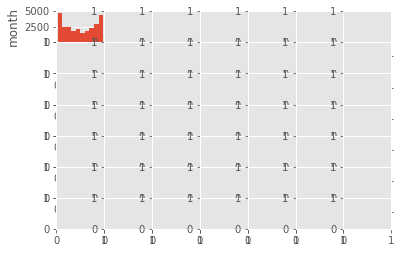

In [222]:
plt.style.available
plt.style.use('ggplot')

pd.plotting.scatter_matrix(result)